In [1]:
import numpy as np
import pandas as pd
import import_ipynb
import Fonctions
import random

importing Jupyter notebook from Fonctions.ipynb



In [2]:
from random import sample
from random import randint 
from scipy.optimize import fsolve

In [3]:
#pip install geneticalgorithm

In [4]:
#Decision Variables :
        
list_facilities =  ["A","B","C","D"]
custumer = list(range(1,8))
cost_delivery ={"A":[4,6,4,5,5,6,3],"B":[3,5,4,2,4,6,2],"C":[5,4,5,6,6,4,5],"D":[7,5,8,5,6,7,6]}
cost_activation ={"A":750 , "B":1200, "C":900, "D":400}
yearly_demand = {"1":80,"2":270,"3":250,"4":160,"5":180,"6":200,"7":180}
yearly_capacity = {"A":400 , "B":700 , "C":550, "D":440}

In [5]:
# Production DataFrame
production =  [cost_activation, yearly_capacity]
df_production = pd.DataFrame(data = production, index = ["Activation Price ($) ","Yearly Capacity (Unity)"])
df_production.T

,Activation Price ($),Yearly Capacity (Unity)
A,750,400
B,1200,700
C,900,550
D,400,440


In [6]:
# Yearly Demand
print("         Yearly Demand")

df_yearly_demand = pd.DataFrame(yearly_demand.values())
df_yearly_demand.T

         Yearly Demand


,0,1,2,3,4,5,6
0,80,270,250,160,180,200,180


In [7]:
#Cost Matrix
cost_matrix = []
for i in range(len(list_facilities)):
    cost_matrix.append(cost_delivery[list_facilities[i]])
cost_matrix = np.asarray(cost_matrix)
#print(cost_matrix)
print("     Cost Matrix")
df2 =  pd.DataFrame(cost_matrix, index = list_facilities, columns = list(range(1,len(custumer)+1))   )
df2

     Cost Matrix


,1,2,3,4,5,6,7
A,4,6,4,5,5,6,3
B,3,5,4,2,4,6,2
C,5,4,5,6,6,4,5
D,7,5,8,5,6,7,6


### Generate Parents
We create Parents 1 & 2

In [8]:
Natural_selection = Fonctions.natural_selection()
#print(Natural_selection)

In [9]:
Parent1 = Natural_selection[0][1]
df = pd.DataFrame(Parent1, index = list_facilities, columns = list(np.arange(1,8)))
df

,1,2,3,4,5,6,7
A,3,192,0,0,0,0,0
B,49,0,250,160,0,3,132
C,28,78,0,0,180,189,0
D,0,0,0,0,0,8,48


In [10]:
Parent2 = Natural_selection[1][1]
df = pd.DataFrame(Parent2, index = list_facilities, columns = list(np.arange(1,8)))
df

,1,2,3,4,5,6,7
A,70,114,11,49,60,0,31
B,0,156,176,0,0,181,0
C,10,0,63,111,120,0,149
D,0,0,0,0,0,19,0


In [11]:
print("Price of Combination Parent 1 : ",Natural_selection[0][0],"$")
print("Price of Combination Parent 2 : ",Natural_selection[1][0],"$")

Price of Combination Parent 1 :  8795 $
Price of Combination Parent 2 :  8799 $


### Analyse of Parents 1 & 2

                            ****   Parent 1  ****
+============================================================================+
+============================================================================+
Production of Facility A  =  195  < Maximal Capacity of Production :  400
Production of Facility B  =  594  < Maximal Capacity of Production :  700
Production of Facility C  =  475  < Maximal Capacity of Production :  550
Production of Facility D  =  56  < Maximal Capacity of Production :  440
+============================================================================+
| Total Production :  1320            | 
+============================================================================+
1320
+============================================================================+

 Custumer  1 : 80 |  Custumer  2 : 270 |  Custumer  3 : 250 | 
 Custumer  4 : 160 |  Custumer  5 : 180 |  Custumer  6 : 200 | 
 Custumer  7 : 180 | 
+===============================================================

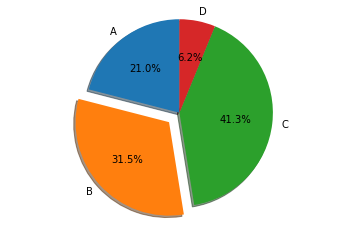

None

Somme secondaire :  1914
 Facility  A : 1914$ | Somme secondaire :  4863
 Facility  B : 2949$ | Somme secondaire :  8051
 Facility  C : 3188$ | 
Somme secondaire :  8795
 Facility  D : 744$ | 
+============================================================================+
| Total Price of Production : 8795 $
+============================================================================+
8795


In [12]:
# Total Demand by Custumer
print("                            ****   Parent 1  ****")
print("+============================================================================+")
print(Fonctions.bill(Parent1))

                            ****   Parent 2  ****
+============================================================================+
+============================================================================+
Production of Facility A  =  335  < Maximal Capacity of Production :  400
Production of Facility B  =  513  < Maximal Capacity of Production :  700
Production of Facility C  =  453  < Maximal Capacity of Production :  550
Production of Facility D  =  19  < Maximal Capacity of Production :  440
+============================================================================+
| Total Production :  1320            | 
+============================================================================+
1320
+============================================================================+

 Custumer  1 : 80 |  Custumer  2 : 270 |  Custumer  3 : 250 | 
 Custumer  4 : 160 |  Custumer  5 : 180 |  Custumer  6 : 200 | 
 Custumer  7 : 180 | 
+===============================================================

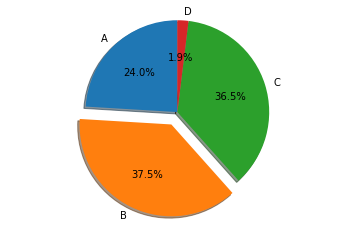

None

Somme secondaire :  2396
 Facility  A : 2396$ | Somme secondaire :  6166
 Facility  B : 3770$ | Somme secondaire :  9562
 Facility  C : 3396$ | 
Somme secondaire :  10095
 Facility  D : 533$ | 
+============================================================================+
| Total Price of Production : 10095 $
+============================================================================+
10095


In [13]:
print("                            ****   Parent 2  ****")
print("+============================================================================+")
print(Fonctions.bill(Parent2))

In [14]:
#df = pd.DataFrame(Parent1, columns = list(range(1,8)))
#df.describe()

### Generate Children 1 & 2

In [15]:
List_Child = list(Fonctions.crossOver(Parent1, Parent2))
Child1 = List_Child[0]
Child2 = List_Child[1]

print("Child 1 : \n")
df = pd.DataFrame(Child1, index = list_facilities, columns = list(np.arange(1,8)))
df

Child 1 : 



,1,2,3,4,5,6,7
A,3,192,0,0,0,0,0
B,49,0,250,160,0,3,132
C,10,0,63,111,120,0,149
D,0,0,0,0,0,19,0


In [16]:
print("Child 2 : \n")
df = pd.DataFrame(Child2, index = list_facilities, columns = list(np.arange(1,8)))
df

Child 2 : 



,1,2,3,4,5,6,7
A,70,114,11,49,60,0,31
B,0,156,176,0,0,181,0
C,28,78,0,0,180,189,0
D,0,0,0,0,0,8,48


### Check Child 

In [17]:
print("Child 1 correct? ",Fonctions.check_demand(Child1)[0], "    ---    Falt Demands: ", Fonctions.check_demand(Child1)[1])
print("Child 2 correct? ",Fonctions.check_demand(Child2)[0], "    ---    Falt Demands: ", Fonctions.check_demand(Child2)[1])

Child 1 correct?  False     ---    Falt Demands:  [-18, -78, 63, 111, -60, -178, 101]
Child 2 correct?  False     ---    Falt Demands:  [18, 78, -63, -111, 60, 178, -101]


In [18]:
print("Child 1 correct? ",Fonctions.check_capacity(Child1)[0], "    ---    Falt Capacity: ", Fonctions.check_capacity(Child1)[1])
print("Child 2 correct? ",Fonctions.check_capacity(Child2)[0], "    ---    Falt Capacity: ", Fonctions.check_capacity(Child2)[1])

Child 1 correct?  True     ---    Falt Capacity:  [-205, -106, -97, -421]
Child 2 correct?  True     ---    Falt Capacity:  [-65, -187, -75, -384]


### CrossOver Condition


In [19]:
Child1  = Fonctions.crossOver_condition(Child1)
df = pd.DataFrame(Child1, index = list_facilities, columns = list(np.arange(1,8)))
df


,1,2,3,4,5,6,7
A,3,192,0,0,0,0,0
B,49,0,187,49,0,181,132
C,10,0,63,111,120,0,48
D,18,78,0,0,60,19,0


In [20]:
Child2 = Fonctions.crossOver_condition(Child2)
#print(Child2)
df = pd.DataFrame(Child2, index = list_facilities, columns = list(np.arange(1,8)))
df

,1,2,3,4,5,6,7
A,52,114,11,49,60,0,31
B,0,78,176,0,0,181,0
C,28,78,0,0,120,11,101
D,0,0,63,111,0,8,48


### Check CrossOver Result

In [21]:
print("Child 1 correct? ",Fonctions.check_demand(Child1)[0], "    ---    Falt Demands: ", Fonctions.check_demand(Child1)[1])
print("Child 2 correct? ",Fonctions.check_demand(Child2)[0], "    ---    Falt Demands: ", Fonctions.check_demand(Child2)[1])

Child 1 correct?  True     ---    Falt Demands:  [0, 0, 0, 0, 0, 0, 0]
Child 2 correct?  True     ---    Falt Demands:  [0, 0, 0, 0, 0, 0, 0]


In [22]:
print("Child 1 correct? ",Fonctions.check_capacity(Child1)[0], "    ---    Falt Capacity: ", Fonctions.check_capacity(Child1)[1])
print("Child 2 correct? ",Fonctions.check_capacity(Child2)[0], "    ---    Falt Capacity: ", Fonctions.check_capacity(Child2)[1])

Child 1 correct?  True     ---    Falt Capacity:  [-205, -102, -198, -265]
Child 2 correct?  True     ---    Falt Capacity:  [-83, -265, -212, -210]


### Mutation
Mutation for Child 1

In [23]:
df = pd.DataFrame(Child1, index = list_facilities, columns = list(np.arange(1,8)))
df

,1,2,3,4,5,6,7
A,3,192,0,0,0,0,0
B,49,0,187,49,0,181,132
C,10,0,63,111,120,0,48
D,18,78,0,0,60,19,0


In [24]:
#Fonctions.Mutation(Child1)
mutation = Fonctions.Mutation(Child1)

df = pd.DataFrame(mutation, index = list_facilities, columns = list(np.arange(1,8)))
df

Element : 192  Index row : 0 Index columns : 1
+========================================================================+
Decomposition ->  [147, 45]
+========================================================================+


,1,2,3,4,5,6,7
A,3,147,0,0,0,0,0
B,49,45,187,49,0,181,132
C,10,0,63,111,120,0,48
D,18,78,0,0,60,19,0


+============================================================================+
Production of Facility A  =  150  < Maximal Capacity of Production :  400
Production of Facility B  =  643  < Maximal Capacity of Production :  700
Production of Facility C  =  352  < Maximal Capacity of Production :  550
Production of Facility D  =  175  < Maximal Capacity of Production :  440
+============================================================================+
| Total Production :  1320            | 
+============================================================================+
1320
+============================================================================+

 Custumer  1 : 80 |  Custumer  2 : 270 |  Custumer  3 : 250 | 
 Custumer  4 : 160 |  Custumer  5 : 180 |  Custumer  6 : 200 | 
 Custumer  7 : 180 | 
+============================================================================+
|               Total of Demands  by Custumer:   1320 |
+========================================================

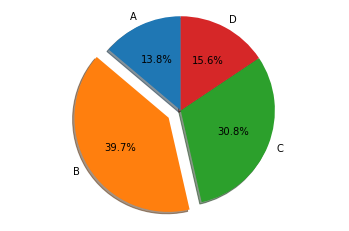

None

Somme secondaire :  1644
 Facility  A : 1644$ | Somme secondaire :  5412
 Facility  B : 3768$ | Somme secondaire :  8303
 Facility  C : 2891$ | 
Somme secondaire :  9712
 Facility  D : 1409$ | 
+============================================================================+
| Total Price of Production : 9712 $
+============================================================================+


9712

In [25]:
Fonctions.bill(mutation)